## י רגרסיה ליניארית מקומית $Local Linear Regression - LLR$ י  

## **י מבוא י**  
י רגרסיה ליניארית מקומית $(LLR)$ היא **שיטה לא-פרמטרית** המבצעת התאמה גמישה של נתונים על ידי **חישוב רגרסיה ליניארית בכל נקודה $x_0$ בנפרד**.  
בניגוד לרגרסיה ליניארית גלובלית שמתאימה **קו יחיד** לכל הנתונים, $LLR$ **מתאימה קו ליניארי קטן לכל אזור מקומי**. י  

📌 **י מתי $LLR$ מועילה? י**  
- י כאשר הקשר בין המשתנים אינו **ליניארי גלובלי**, אך ניתן להניח **ליניאריות מקומית**. י  
- י כאשר נרצה **מודל גמיש יותר** מרגרסיה ליניארית פשוטה, אך לא מסובך כמו רשתות נוירונים. י  
- י כאשר הנתונים **משתנים מקומית** וקיים צורך בהתאמה טובה לאזורים שונים. י  

---

## **📌 י עקרון הפעולה של $LLR$ י**  
**י הרעיון המרכזי:** י  
י במקום להתאים קו **לכל הנתונים** כמו ברגרסיה ליניארית רגילה, אנו **מתאימים קו נפרד לכל נקודת חיזוי $x_0$**, תוך שימוש **רק בנקודות הקרובות ביותר**. י  

🔹 **י שלבים:** י  
1. **י בחירת נקודת חיזוי $x_0$ י**.  
2. **י משקלול הנתונים הקרובים** – נותנים משקל גבוה יותר לנקודות הקרובות ל-$x_0$. י  
3. **י התאמת רגרסיה ליניארית** על נקודות משוקללות בלבד. י  
4. **י חיזוי $\hat{y}(x_0)$** באמצעות המודל המקומי. י  

---

## **📌 י תפקיד פונקציות המשקל $(Kernel Functions)$ י**  
י כדי להבטיח שהתאמת המודל תהיה **מקומית**, משתמשים בפונקציות משקל $(Kernel Functions)$ המעניקות עדיפות **לנקודות הקרובות**: י  

$$K_\lambda(x, x_i) = D\left(\frac{|x_i - x|}{\lambda}\right)$$

י כאשר: י  
- **י $D(x)$** היא פונקציית ה-$Kernel$, שמקצה משקל לכל נקודה בהתאם למרחקה מ-$x_0$. י  
- **י $\lambda$** הוא פרמטר ההחלקה $(Smoothing Parameter)$ שקובע את **גודל האזור המקומי**. י  

### 🔹 **י דוגמאות לפונקציות משקל נפוצות י**  
1. **י Kernel גאוסיאני $(Gaussian Kernel)$ י**  
   $$D(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}$$  
   **י מאפיינים:** י  
   - י כל נקודה **מקבלת משקל חיובי**, גם אם היא רחוקה מאוד. י  
   - י מתאים כאשר רוצים החלקה **רכה והדרגתית** של הנתונים. י  

2. **י Kernel Epanechnikov י**  
   $$D(x) = \begin{cases} \frac{3}{4} (1 - x^2), & |x| < 1 \\ 0, & \text{otherwise} \end{cases}$$  
   **י מאפיינים:** י  
   - י נקודות רחוקות **לא מקבלות משקל כלל**. י  
   - י מתאים כאשר רוצים התאמה **רק לשכנים קרובים**. י  

---

## **📌 י תפקיד הפרמטר $\lambda$ והשפעתו על ביצועי המודל י**  
י $\lambda$ (רוחב חלון) הוא הפרמטר החשוב ביותר ב-$LLR$, שכן הוא קובע **כמה נקודות ישמשו לחיזוי**. י  

| **י ערך $\lambda$ י** | **י השפעה על המודל י** |
|-----------------|----------------|
| **י $\lambda$ קטן מאוד י** | משקל גבוה רק לשכנים הקרובים → שונות גבוהה, הטיה נמוכה $(Overfitting)$ י |
| **י $\lambda$ גדול י** | משתמש בהרבה שכנים → שונות נמוכה, הטיה גבוהה $(Underfitting)$ י |

🔹 **י איזון בין הטיה לשונות $(Bias-Variance Tradeoff)$:** י  
- **י אם $\lambda$ קטן מידי → המודל מתאים עצמו לרעש** (מושפע מתצפיות ספציפיות). י  
- **י אם $\lambda$ גדול מידי → המודל נהיה כמו רגרסיה ליניארית גלובלית** (מאבד את היתרון המקומי). י  

📌 **י הבחירה של $\lambda$ חשובה! לרוב נקבעת באמצעות קרוס-ולידציה. י**  

---

## **📌 י יתרונות וחסרונות של $LLR$ י**  
| **י יתרון י** | **י חיסרון י** |
|--------|--------|
| י מתאים ליחסים לא ליניאריים י | י דורש חישוב רגרסיה נפרד לכל נקודה י |
| י שומר על אינטואיציה של רגרסיה ליניארית י | י רגיש מאוד לפרמטר $\lambda$ י |
| י פחות רגיש לרעש מאשר $KNN$ י | י ביצועים נמוכים כאשר יש מימד גבוה י |

---

## **📌 י דוגמאות קוד להמחשת $LLR$ י**  


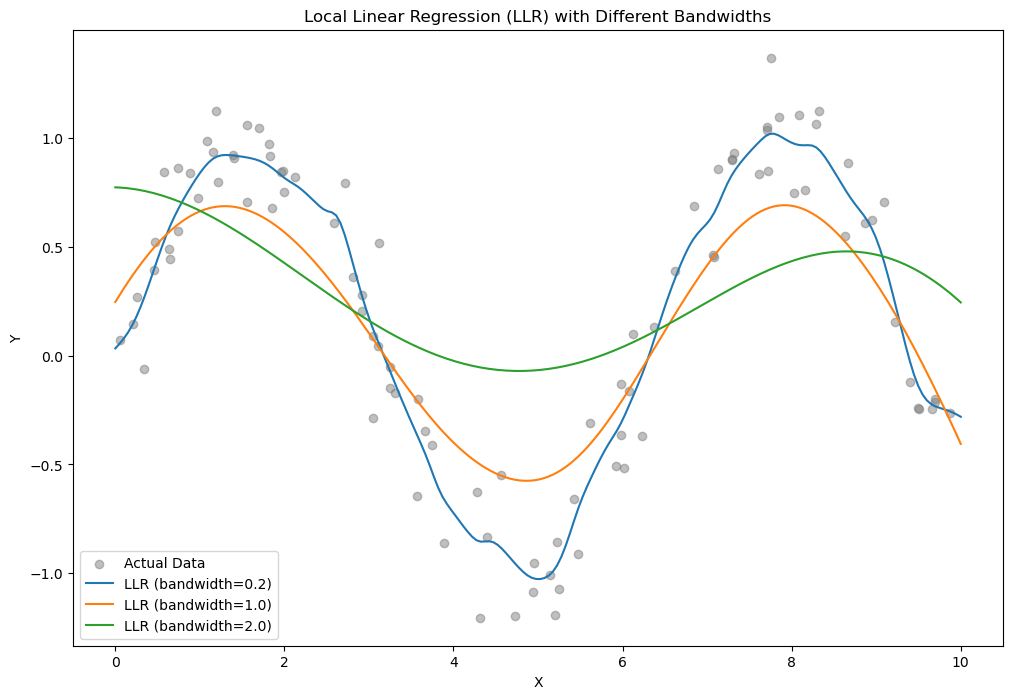

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# ----------------------------
# פונקציה לרגרסיה ליניארית מקומית (LLR)
# ----------------------------
def local_linear_regression(X_train, y_train, x_query, bandwidth):
    """
    מבצעת רגרסיה ליניארית מקומית בנקודה בודדת x_query.
    
    פרמטרים:
    ----------
    X_train : ndarray בצורת (n_samples, 1)
        וקטור ערכי X לאימון.
    y_train : ndarray בצורת (n_samples,)
        וקטור ערכי y המתאימים ל-X_train.
    x_query : float או ndarray בצורת (1,)
        הנקודה שעליה רוצים לחזות ערך y חדש.
    bandwidth : float
        פרמטר רוחב חלון (bandwidth) של גרעין גאוסיאני.
        
    מחזיר:
    ----------
    y_pred : float
        ערך החיזוי עבור x_query אחרי התאמת רגרסיה ליניארית מקומית.
    """
    # חישוב משקלים באמצעות גרעין גאוסיאני (Gaussian Kernel)
    # אם נרצה קרנל יותר סטנדרטי, אפשר להשתמש ב:
    # np.exp(-((X_train - x_query)**2) / (2 * (bandwidth**2)))
    weights = np.exp(-0.5 * ((X_train - x_query) / bandwidth)**2)
    
    # בניית מודל רגרסיה ליניארית עם משקולות
    model = LinearRegression()
    model.fit(X_train, y_train, sample_weight=weights.ravel())
    
    # חיזוי הערך ב-x_query (נדרש מערך דו-ממדי ב-sklearn)
    y_pred = model.predict([[x_query]])
    return y_pred[0]

# ----------------------------
# יצירת נתונים סינתטיים
# ----------------------------
np.random.seed(42)
n_samples = 100
X = np.sort(10 * np.random.rand(n_samples, 1), axis=0)
Y = np.sin(X).ravel() + np.random.randn(n_samples) * 0.2  # עם רעש להדגמה

# ----------------------------
# הדגמת רגרסיה ליניארית מקומית עבור מספר ערכי רוחב חלון (Bandwidth)
# ----------------------------
X_test = np.linspace(0, 10, 200)  # רשת נקודות לחיזוי
bandwidths = [0.2, 1.0, 2.0]      # דוגמא לשלושה ערכי Bandwidth שונים

plt.figure(figsize=(12, 8))
plt.scatter(X, Y, color="gray", alpha=0.5, label="Actual Data")

for bw in bandwidths:
    Y_pred = []
    for x_val in X_test:
        y_val = local_linear_regression(X, Y, x_val, bandwidth=bw)
        Y_pred.append(y_val)
    Y_pred = np.array(Y_pred)

    plt.plot(X_test, Y_pred, label=f"LLR (bandwidth={bw})")

plt.title("Local Linear Regression (LLR) with Different Bandwidths")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


## י הגרף מציג כיצד $LLR$ מתאים קו שונה לכל אזור, ומשיג התאמה גמישה יותר מאשר רגרסיה ליניארית גלובלית. י  

## **📌 י סיכום י**  
✔ י $LLR$ היא הרחבה של רגרסיה ליניארית המאפשרת גמישות מקומית. י  
✔ י השימוש בפונקציות $Kernel$ מאפשר משקל דיפרנציאלי לנקודות סמוכות. י  
✔ י הפרמטר $(\lambda)$ קריטי לאיזון בין שונות והטיה. י  
✔ י $LLR$ מספק ביצועים טובים יותר מ-$KNN$ במקרים של מגמות מקומיות. י  

📌 **י באמצעות $LLR$ ניתן לשפר ניבוי וללמוד מבנים לא ליניאריים בנתונים בצורה מתקדמת! 🚀 י**  

# 📌 י $Epanechnikov Kernel$ לעומת $Nearest Neighbor Kernel$ י  

## **📌 י מהו $Kernel$ ולמה הוא חשוב ב-$LLR$? י**  
י $Kernel$ היא פונקציה שמקצה **משקל שונה לכל תצפית** בהתאם למרחקה מהנקודה $x_0$ שבה אנו מבצעים חיזוי. י  
י המטרה של פונקציות $Kernel$ היא **לתת עדיפות לנקודות קרובות**, תוך **דיכוי ההשפעה של נקודות רחוקות**. י  

י פונקציות $Kernel$ משפיעות על רגרסיה ליניארית מקומית $LLR$ בכך שהן **קובעות איך בוחרים וממשקלים את השכנים הקרובים לנקודת החיזוי**. י  

---

## **📌 י $Epanechnikov Kernel$ י**  
י $Kernel Epanechnikov$ הוא אחת הפונקציות הנפוצות ביותר ב-$LLR$ מכיוון שהיא **מינימלית מבחינת השונות** $(Minimizes Mean Squared Error)$. י  
היא מוגדרת כך: י  

$$
K(u) =
\begin{cases} 
\frac{3}{4} (1 - u^2), & |u| < 1 \\
0, & \text{otherwise}
\end{cases}
$$

י כאשר: י  
- **י $u = \frac{x - x_0}{\lambda}$** – המרחק המנורמל של $x$ מנקודת החיזוי $x_0$. י  
- **י אם $|u| > 1$**, כלומר אם הנקודה רחוקה מדי, היא **לא מקבלת כלל משקל**. י  

🔹 **י מאפיינים של $Epanechnikov Kernel$: י**  
- י הוא משקלל **רק נקודות בטווח $\lambda$** – כלומר מחוץ לחלון ההחלקה אין כל השפעה. י  
- י משקל הנקודות **יורד בצורה ריבועית**, כך שנקודות רחוקות **משפיעות פחות**. י  
- י **יעיל מבחינה חישובית** כי הוא חותך ערכים רחוקים. י  

---

## **📌 י $Nearest Neighbor Kernel$ י**  
י $Kernel$ הקרוב ביותר $(Nearest Neighbor)$ הוא **המקרה הקיצוני של $Kernel$ אחיד $(Uniform Kernel)$**. י  
י הוא מגדיר **משקל אחיד** לכל התצפיות הקרובות ביותר **ומאפס את השאר**: י  

$$
K(u) =
\begin{cases} 
1, & |u| < 1 \\
0, & \text{otherwise}
\end{cases}
$$

🔹 **י מאפיינים של $Nearest Neighbor Kernel$: י**  
- י רק ה-$K$ השכנים הקרובים ביותר משמשים לחיזוי. י  
- י כל ה-$K$ השכנים מקבלים **אותו משקל** – אין תלות במרחק היחסי מנקודת החיזוי. י  
- י **רגיש לרעש**, כי אם נקודה מסוימת נכללת או לא נכללת ב-$K$ יכולה להשפיע מאוד על התחזית. י  

---

## **📌 י ההבדל בין $Epanechnikov Kernel$ ל-$Nearest Neighbor Kernel$ י**  
| **י מאפיין י** | **י $Epanechnikov Kernel$ י** | **י $Nearest Neighbor Kernel$ י** |
|------------|------------------|------------------|
| **י השפעה על נקודות רחוקות י** | י נקודות מחוץ לטווח $\lambda$ אינן נכללות י | י רק $K$ השכנים הקרובים נכללים י |
| **י הקצאת משקלות י** | י נקודות קרובות מקבלות משקל גבוה יותר י | י כל השכנים מקבלים משקל שווה י |
| **י רגישות לרעש י** | י נמוכה יותר $(\text{מכיוון שמשקל יורד עם המרחק})$ י | י גבוהה $(\text{יכולה לכלול נקודות לא רלוונטיות})$ י |
| **י מורכבות חישובית י** | י יעיל, פחות חישובי מ-$Gaussian$ י | י פשוט מאוד י |
| **י התאמה למבנים מקומיים י** | י מתאים להחלקת מגמות תוך שמירה על גמישות י | י מתאים למצבים בהם רוצים חישוב פשוט ומהיר י |

📌 **י במקרים של נתונים צפופים, $Nearest Neighbor$ עשוי להיות רועש, בעוד ש-$Epanechnikov$ מספק איזון טוב יותר בין דיוק לגמישות. י**  

---

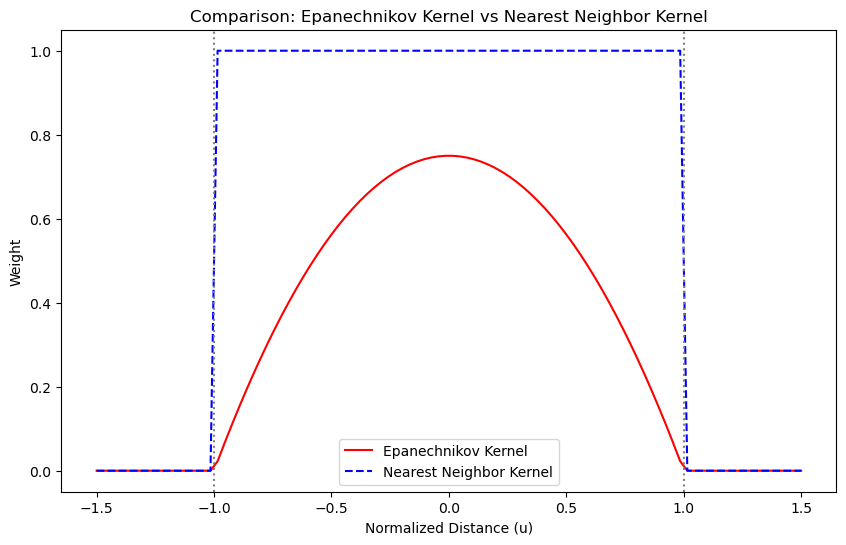

In [7]:
## **📌 דוגמה להמחשה באמצעות קוד**
import numpy as np
import matplotlib.pyplot as plt

# יצירת Kernel Epanechnikov
def epanechnikov_kernel(u):
    return np.where(np.abs(u) < 1, 0.75 * (1 - u**2), 0)

# יצירת Kernel של Nearest Neighbor
def nearest_neighbor_kernel(u):
    return np.where(np.abs(u) < 1, 1, 0)

# יצירת תחום ערכים להדגמה
u_values = np.linspace(-1.5, 1.5, 100)

# חישוב משקלות לכל Kernel
epanechnikov_values = epanechnikov_kernel(u_values)
nearest_neighbor_values = nearest_neighbor_kernel(u_values)

# יצירת גרף השוואתי
plt.figure(figsize=(10,6))
plt.plot(u_values, epanechnikov_values, label="Epanechnikov Kernel", color="red")
plt.plot(u_values, nearest_neighbor_values, label="Nearest Neighbor Kernel", color="blue", linestyle="dashed")
plt.axvline(x=-1, color="gray", linestyle="dotted")
plt.axvline(x=1, color="gray", linestyle="dotted")
plt.xlabel("Normalized Distance (u)")
plt.ylabel("Weight")
plt.title("Comparison: Epanechnikov Kernel vs Nearest Neighbor Kernel")
plt.legend()
plt.show()

## י ניתוח גרפי של פונקציות $Kernel$ י  
י ניתן לראות: י  
- **י $Epanechnikov Kernel$** יורד בהדרגה לקראת הקצה, מה שמפחית השפעה של נקודות רחוקות. י  
- **י $Nearest Neighbor Kernel$** נותן משקל אחיד לכל הנקודות עד מרחק $1$, ואז מאפס אותן לחלוטין. י  

## **📌 י מתי לבחור כל $Kernel$? י**  

| **י סוג הנתונים י** | **י $Epanechnikov Kernel$ י** | **י $Nearest Neighbor Kernel$ י** |
|----------------|------------------------|----------------------------|
| **י נתונים רועשים י** | ✅ מתאים (מפחית השפעה של רעש) | ❌ לא מתאים (יכול לכלול נקודות רועשות) |
| **י נתונים בצפיפות משתנה י** | ✅ מתאים (משתמש רק בנקודות חשובות) | ❌ לא מתאים (לא מבצע משקלול של המרחק) |
| **י חישוב מהיר ויעיל י** | ✅ יעיל (מינימיזציה של $MSE$) | ✅ מהיר מאוד ופשוט |
| **י התאמה להחלקה מתקדמת י** | ✅ טוב למודלים לא ליניאריים | ❌ פחות מומלץ |

### **📌 י המלצות לשימוש: י**  
- **י לנתונים עם מגמות מקומיות ודרישות דיוק גבוהות**, מומלץ להשתמש ב-**$Epanechnikov Kernel$**. י  
- **י אם נדרש חישוב פשוט ומהיר** (למשל, ברגרסיות מבוססות $KNN$), אפשר להשתמש ב-**$Nearest Neighbor Kernel$**. י  

## **📌 י סיכום י**  
✔ **י $Epanechnikov Kernel$ מתאים לרגרסיות מקומיות, מאזן היטב דיוק וגמישות. י**  
✔ **י $Nearest Neighbor Kernel$ פשוט ומהיר אך רגיש לרעש. י**  
✔ **י בחירה נכונה של $Kernel$ תלויה בסוג הנתונים ובדרישות הניתוח. י**  

📌 **י באמצעות בחירה חכמה של פונקציית $Kernel$ ניתן לשפר משמעותית את ביצועי רגרסיה ליניארית מקומית! 🚀 י**  

# **📌 י סוגי $Kernel$ נוספים והשפעתם על ביצועי $LLR$ י**  

## **📌 י חשיבות בחירת $Kernel$ י**  
י פונקציות $Kernel$ משפיעות על **איך נקבע אילו תצפיות משפיעות על החיזוי המקומי** ב-$LLR$. י  
י הבחירה הנכונה תלויה בסוג הנתונים, ברעש הנתון ובאיזון בין **הטיה לשונות**. י  

י בין $Kernel$ נפוצים: י  
1. **י $Gaussian Kernel$ (גאוסיאני) י**  
2. **י $Epanechnikov Kernel$ (כבר הוסבר) י**  
3. **י $Uniform Kernel$ (אחיד) י**  
4. **י $Triweight Kernel$ י**  
5. **י $Tricube Kernel$ י**  
6. **י $Cosine Kernel$ י**  
7. **י $Biweight Kernel (Quartic Kernel)$ י**  

---

## **📌 י 1. $Gaussian Kernel$ - פונקציית גאוס י**  
$$K(u) = \frac{1}{\sqrt{2\pi}} e^{-\frac{u^2}{2}}$$  
🔹 **י מאפיינים**: י  
- י תמיד **משפיע על כל התצפיות**, כי הוא לעולם אינו מתאפס. י  
- י מתאים כשיש **שונות גבוהה ורוצים החלקה עדינה**. י  
- י פחות רגיש ל-**Noise**, אבל **יקר חישובית** (לא מתעלם מנקודות רחוקות). י  

---

## **📌 י 2. $Uniform Kernel$ - $Kernel$ אחיד י**  
$$K(u) =
\begin{cases}
1, & |u| < 1 \\
0, & \text{otherwise}
\end{cases}$$  
🔹 **י מאפיינים**: י  
- י נותן **משקל זהה** לכל התצפיות בתוך רדיוס $\lambda$. י  
- **י לא משקלל מרחקים** → מתאים ל-$KNN$ עם **מספר שכנים קבוע**. י  
- י פשוט **מאוד ומהיר**, אך רגיש לרעש. י  

---

## **📌 י 3. $Triweight Kernel$ - משקל משולש י**  
$$K(u) =
\begin{cases}
\frac{35}{32} (1 - u^2)^3, & |u| < 1 \\
0, & \text{otherwise}
\end{cases}$$  
🔹 **י מאפיינים**: י  
- **י מוריד משקל לנקודות רחוקות מהר יותר** מ-$Epanechnikov$. י  
- י מתאים כשנרצה **החלקה חזקה ולהימנע מרעש**. י  

---

## **📌 י 4. $Tricube Kernel$ - משקל קובייתי י**  
$$K(u) =
\begin{cases}
(1 - |u|^3)^3, & |u| < 1 \\
0, & \text{otherwise}
\end{cases}$$  
🔹 **י מאפיינים**: י  
- י מסנן רעש טוב יותר מ-$Epanechnikov$. י  
- **י משקל גבוה מאוד לנקודות קרובות** ומדכא רחוקות. י  
- י מעולה למודלים בהם יש שינויים פתאומיים בנתונים. י  

---

## **📌 י 5. $Cosine Kernel$ - $Kernel$ קוסינוס י**  
$$K(u) =
\begin{cases}
\frac{\pi}{4} \cos \left( \frac{\pi}{2} u \right), & |u| < 1 \\
0, & \text{otherwise}
\end{cases}$$  
🔹 **י מאפיינים**: י  
- י שימושי כאשר יש מחזורים $(\text{מחזוריות בנתונים})$. י  
- י נותן **מעבר חלק** בין נקודות קרובות לרחוקות. י  

---

## **📌 י 6. $Biweight Kernel (Quartic Kernel)$ - $Kernel$ מרובע י**  
$$K(u) =
\begin{cases}
\frac{15}{16} (1 - u^2)^2, & |u| < 1 \\
0, & \text{otherwise}
\end{cases}$$  
🔹 **י מאפיינים**: י  
- י דומה ל-$Epanechnikov$ אך נוטה להחלקה יותר **רכה**. י  
- **י משפר ניבוי במקרים עם נתונים רועשים**. י  

---

## **📌 י השוואת פונקציות $Kernel$ בגרף י**  


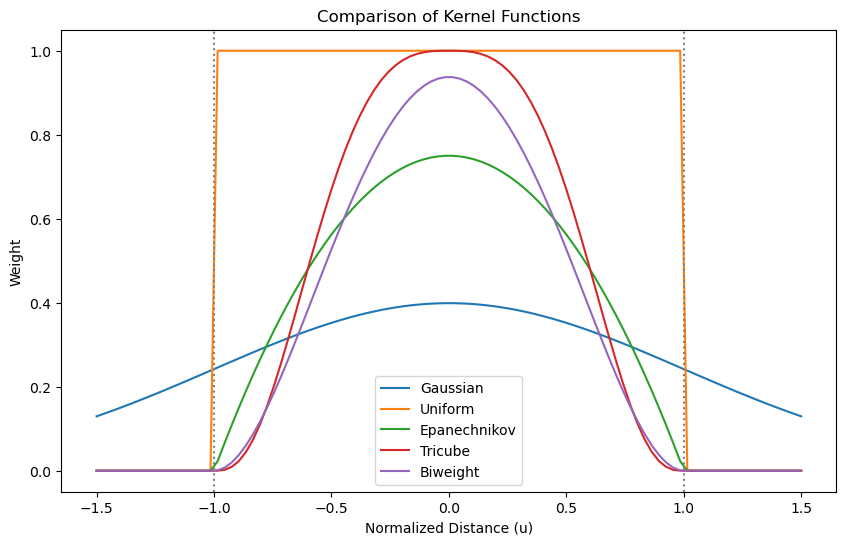

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# פונקציות Kernel
def gaussian_kernel(u):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u**2)

def uniform_kernel(u):
    return np.where(np.abs(u) < 1, 1, 0)

def epanechnikov_kernel(u):
    return np.where(np.abs(u) < 1, 0.75 * (1 - u**2), 0)

def tricube_kernel(u):
    return np.where(np.abs(u) < 1, (1 - np.abs(u)**3)**3, 0)

def biweight_kernel(u):
    return np.where(np.abs(u) < 1, (15 / 16) * (1 - u**2)**2, 0)

# יצירת טווח ערכים
u_values = np.linspace(-1.5, 1.5, 100)

# חישוב Kernel שונים
kernels = {
    "Gaussian": gaussian_kernel(u_values),
    "Uniform": uniform_kernel(u_values),
    "Epanechnikov": epanechnikov_kernel(u_values),
    "Tricube": tricube_kernel(u_values),
    "Biweight": biweight_kernel(u_values)
}

# ציור הגרפים
plt.figure(figsize=(10, 6))
for name, values in kernels.items():
    plt.plot(u_values, values, label=name)

plt.axvline(x=-1, color="gray", linestyle="dotted")
plt.axvline(x=1, color="gray", linestyle="dotted")
plt.xlabel("Normalized Distance (u)")
plt.ylabel("Weight")
plt.title("Comparison of Kernel Functions")
plt.legend()
plt.show()

## י 📌 השוואה בין פונקציות $Kernel$ ברגרסיה ליניארית מקומית י  

## **📌 י מה רואים בגרף? י**  
- **י $Gaussian$** → מתרחק לאינסוף (כל נקודה משפיעה במידה מסוימת). י  
- **י $Uniform$** → משקל קבוע (חותך ב-1, כמו $KNN$). י  
- **י $Epanechnikov$** → משקל גבוה למרכז, מתאפס בקצה. י  
- **י $Tricube$** → משקל גבוה מאוד קרוב ומדכא רחוקות. י  
- **י $Biweight$** → דומה ל-$Epanechnikov$ אך עם דעיכה איטית יותר. י  

---

## **📌 י מתי לבחור $Kernel$ מסוים? י**  

| **י תנאי הנתונים י** | **י $Kernel$ מומלץ י** | **י הערות י** |
|------------------|----------------|------------|
| **י נתונים רועשים י** | $Tricube$, $Biweight$ | מפחיתים השפעת נקודות רחוקות |
| **י נתונים אחידים וצפופים י** | $Epanechnikov$ | מתאים לתנאים מגוונים |
| **י נתונים מחזוריים י** | $Cosine$ | טוב לזיהוי מחזורים |
| **י רגרסיה מהירה י** | $Uniform$ | חישוב מהיר מאוד (כמו $KNN$) |
| **י נתונים עם שונות גבוהה י** | $Gaussian$ | מחליק חזק יותר |

---

## **📌 י סיכום י**  
✔ **י $Kernel$ קובעים איך משקללים את השכנים ברגרסיה מקומית. י**  
✔ **י $Epanechnikov$ הוא הבחירה האופטימלית מבחינת שונות נמוכה, אך יש חלופות מתקדמות. י**  
✔ **י $Gaussian$ נותן משקל לכל הנתונים, בעוד ש-$Kernel$ כמו $Tricube$ מגבילים השפעה של רחוקים. י**  
✔ **י בחירת $Kernel$ תלויה בסוג הנתונים, מידת הרעש והאיזון בין הטיה לשונות. י**  

📌 **י הבנה נכונה של $Kernel$ מאפשרת להוציא את המיטב מ-$LLR$ ולשפר ביצועים בבעיות ניבוי מורכבות! 🚀 י**  

---

## **📌 י רגרסיה פולינומית מקומית י**  
- **י במקום להתאים קו ישר מקומי $(f(x) = \alpha + \beta x)$**, אנו **מתאימים פולינום מדרגה $d$**: י  
  $$
  f(x) = \alpha_0 + \alpha_1 x + \alpha_2 x^2 + \dots + \alpha_d x^d
  $$
- י ההתאמה מבוצעת **רק על נקודות קרובות ל-$x_0$** בעזרת **פונקציות משקל $(Kernel Functions)$**. י  

📌 **י ככל שהדרגה $d$ עולה, המודל מקבל יותר גמישות לתאר קשרים לא ליניאריים. י**  

---

## **📌 י דרגות שונות של רגרסיה פולינומית מקומית י**  
| **י דרגה $d$ י** | **י משוואת המודל המקומי י** | **י מאפיינים י** |
|------|-------------------|----------------|
| **י $d = 0$ (Nadarya-Watson Estimator) י** | $f(x) = \alpha_0$ | רק ממוצע משוקלל של השכנים |
| **י $d = 1$ (Local Linear Regression - LLR) י** | $f(x) = \alpha_0 + \alpha_1 x$ | התאמת קו ליניארי לכל נקודה |
| **י $d = 2$ (Local Quadratic Regression) י** | $f(x) = \alpha_0 + \alpha_1 x + \alpha_2 x^2$ | מאפשר תפיסת עקמומיות בקשר בין המשתנים |
| **י $d = 3$ ומעלה י** | $f(x) = \alpha_0 + \alpha_1 x + \dots + \alpha_d x^d$ | מתאים לקשרים מורכבים אך רגיש לרעש |

---

## **📌 י השפעת בחירת $d$ על המודל י**  
- **י $d = 0$** → חיזוי ממוצע מקומי בלבד, ללא שיפוע או עקמומיות. י  
- **י $d = 1$** → התאמת קו מקומי, מהווה את הבסיס ל-$LLR$. י  
- **י $d = 2$ ומעלה** → מסוגל לתאר עקומות בצורה טובה יותר, אך עלול לגרום ללמידת יתר $(Overfitting)$. י  

📌 **י בחירת דרגת הפולינום מתבצעת לרוב באמצעות קרוס-ולידציה. י**  

---

## **📌 י משוואת הרגרסיה הפולינומית המקומית י**  
י אנו פותרים את בעיית הריבועים הפחותים **הממושקלת** עבור כל נקודה $x_0$: י  

$$
\min_{\alpha_0, \alpha_1, \dots, \alpha_d} \sum_{i=1}^{n} K_\lambda(x_0, x_i) \left[y_i - \left(\alpha_0 + \alpha_1 x_i + \dots + \alpha_d x_i^d\right) \right]^2
$$

📌 **י כאן המשקלות $K_\lambda(x_0, x_i)$ מבטיחים שהתאמת הפולינום תתבסס בעיקר על נקודות סמוכות ל-$x_0$. י**  

---

## **📌 י דוגמאות קוד להמחשת רגרסיה פולינומית מקומית י**  


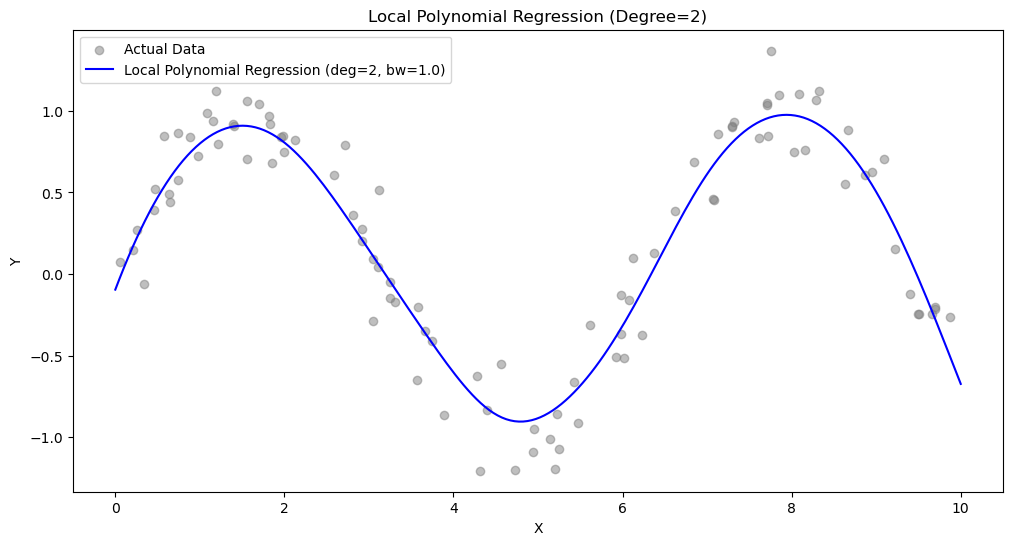

In [9]:


# ----------------------------
# הרחבה לאופציונלית: רגרסיה פולינומית מקומית (Local Polynomial Regression)
# ----------------------------
def local_polynomial_regression(X_train, y_train, x_query, bandwidth, degree=2):
    """
    מבצעת רגרסיה פולינומית מקומית בדרגה מסוימת בנקודה בודדת x_query.
    (לשימוש בהדגמות מתקדמות).
    """
    # משקלים כמו קודם
    weights = np.exp(-0.5 * ((X_train - x_query) / bandwidth)**2)
    
    # הכנת פולינום בדרגה נתונה
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly = poly.fit_transform(X_train)
    
    # התאמת המודל עם המשקולות
    model = LinearRegression()
    model.fit(X_poly, y_train, sample_weight=weights.ravel())
    
    # חיזוי הערך ב-x_query
    x_query_poly = poly.transform([[x_query]])
    return model.predict(x_query_poly)[0]


 # הדגמה אופציונלית: רגרסיה פולינומית מקומית (degree=2)
bandwidth = 1.0
Y_poly_pred = []
for x_val in X_test:
    y_val = local_polynomial_regression(X, Y, x_val, bandwidth=bandwidth, degree=2)
    Y_poly_pred.append(y_val)
Y_poly_pred = np.array(Y_poly_pred)

plt.figure(figsize=(12, 6))
plt.scatter(X, Y, color="gray", alpha=0.5, label="Actual Data")
plt.plot(X_test, Y_poly_pred, color="blue", label=f"Local Polynomial Regression (deg=2, bw={bandwidth})")
plt.title("Local Polynomial Regression (Degree=2)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()